# Data Generation
Heston Model:
$$dS_{t}={\sqrt  {V _{t}}}S_{t}\,dW_{t}$$
$$dV _{t}=a (b -V _{t})\,dt+c {\sqrt  {V _{t}}}\,dZ_{t}\,$$
Model Parameters: 
$$\theta = (a,b,c)$$

Approch: Simulate market S for different parameters using Euler-Maruyama

Goal: function with input: $$(a,b,c,\rho)\ , \ \ 2ab > c^2   \ where \ \rho \ is \ the \ correlation \ of \ bm's$$ and output: $$S(\{(strikes,maturities)\})$$

## Brownian Motion

In [18]:
from math import sqrt
from scipy.stats import norm
import numpy as np

In [19]:
def brownian_motion(n, T, dim, out=None):
    dt = T/n
    
    r = norm.rvs(size=(dim,n+1) , scale=sqrt(dt))

    if out is None:
        out = np.zeros((dim,n+1))
        
    np.cumsum(r, axis=-1, out=out)
 
    return out

In [20]:
n=1000
T=2
dim=5

bm = brownian_motion(n,T,dim)
bm.shape

(5, 1001)

In [21]:
import matplotlib.pyplot as plt

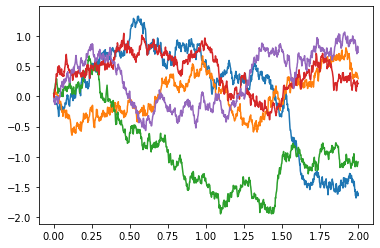

In [22]:
for k in range(dim):    
    plt.plot(np.linspace(0,T,n+1), bm[k,:])    


## Euler Maruyama

For $${\mathrm  {d}}X_{t}=\mu(X_{t})\,{\mathrm  {d}}t+\sigma(X_{t})\,{\mathrm  {d}}W_{t}$$
the method reads: $$\,Y_{{n+1}}=Y_{n}+\mu(Y_{n})\,\Delta t+\sigma(Y_{n})\,(W_{{\tau _{{n+1}}}}-W_{{\tau _{n}}})\, \ 
with \ Y_{{0}} = X_{{0}}$$

In [73]:
from scipy.stats import norm
import numpy as np

In [74]:
def euler_maruyama(mu,sigma,T,x0,W):
    dim = W.shape[0]
    n = W.shape[1]-1
    Y = np.zeros((dim,n+1))
    dt = T/n
    sqrt_dt = np.sqrt(dt)
    for l in range(dim):
        Y[l,0] = x0
        for i in range(n):
            Y[l,i+1] = Y[l,i] + mu(Y[l,i],l,i)*dt + np.multiply(sigma(Y[l,i],l,i)*sqrt_dt,(W[l,i+1]-W[l,i]))
    
    return Y

## Heston Model

In [107]:
def heston(a,b,c,T,W,Z,V0,S0):
    
    def mu2(V,i,k):
        return a*(b-V)
    
    def sigma2(V,i,k):
        return c*np.sqrt(np.maximum(0.0,V))
    
    V = euler_maruyama(mu2,sigma2,T,V0,Z)
    
    def mu1(S,i,k):
        return 0.0
    
    def sigma1(S,i,k):
        return np.sqrt(np.maximum(0.0,V[i,k]))*S
    
    S = euler_maruyama(mu1,sigma1,T,S0,W)
    
    return S,V
    

### Test

In [109]:
a=2
b=3
c=1
T=10
n=1000
dim=50
W=brownian_motion(n,T,dim)
Z=brownian_motion(n,T,dim)
V0 = 2
S0 = 1

S,V = heston(a,b,c,T,W,Z,V0,S0)
S_T = S[:,10]
S_T_mean = np.mean(S_T, axis=0)

print(S_T_mean)

1.0027265203569327


Note: All numbers suspiciously close to 1, something probably wrong

## Actually Generate Data

Generate grid of input data. Use Pandas to write  data to csv

In [57]:
import pandas as pd